In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
from stabilizer import *
import matplotlib.pyplot as plt

In [2]:
gates = randcircuit(3,4)
initial = ['000', '100']
codewords = find_codewords(initial, gates)
codewords, gates

(['101', '001'], [('X', (2,)), ('CX', (2, 1)), ('CX', (2, 1)), ('CX', (2, 0))])

In [3]:
log = ['XII+', 'ZII+']
stabs = ['IZI+', 'IIZ+']
new_logs = evolve_operators(log, gates)
new_stabs = evolve_operators(stabs, gates)
new_logs, new_stabs

(['XII+', 'ZIZ+'], ['IZI+', 'IIZ-'])

In [4]:
gates

[('X', (2,)), ('CX', (2, 1)), ('CX', (2, 1)), ('CX', (2, 0))]

In [5]:
x = []
y = []


In [7]:
# gates[0][1][1]
gates = randcircuit(3,4)
initial = ['000', '100']
log = ['XII+', 'ZII+']
stabs = ['IZI+', 'IIZ+']

codewords = find_codewords(initial, gates)
# codewords
newstabilizers = (evolve_stabilizers(stabs, gates, log))[0]


for i in range(11):
    x.append(i/10)

    #make lists of error, prob of error, and stabilizer measurements
    errors = construct_list_errors(3,3)
    table = []
    for error in errors:
        errorstate = apply_error_recovery(codewords[0], error)
        result = measure_stabilizers(newstabilizers, errorstate)
        prob = single_recovery_probability(error, i/10)
        table.append([error, prob, result])
        

    #sort list in order of prob
    def func(e):
        return e[1]
    table.sort(key=func)


    #sum the first half of prob to find logical error rate 
    sum = 0
    for i in range(4):
        sum+= table[i][1]
    y.append(sum)


NameError: name 'x' is not defined

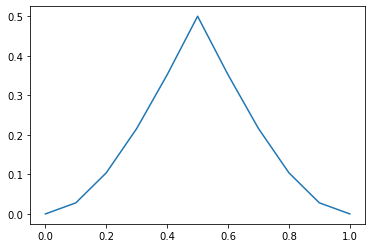

In [7]:
plt.plot(x,y)



In [3]:

gates = [('CX', (0, 1)), ('CX', (0, 2))]
initial = ['000', '100']
log = ['XII+', 'ZII+']
stabs = ['IZI+', 'IIZ+']
codewords = find_codewords(initial, gates)
newlogs = evolve_operators(log, gates)

codewords, newlogs

(['000', '111'], ['XXX+', 'ZII+'])

In [10]:
from copy import deepcopy
a = [1,2]
b = deepcopy(a)
b[0] = 3
a

[1, 2]

In [9]:
a = "12"
b = a
b += "3"
a

'12'

In [15]:
gates = randcircuit(3,4)
initial = ['000', '100']
log = ['XII+', 'ZII+']
stabs = ['IZI+', 'IIZ+']

codewords = find_codewords(initial, gates)
# codewords
newstabilizers = (evolve_stabilizers(stabs, gates, log))[0]





#make lists of error, prob of error, and stabilizer measurements
errors = construct_list_errors(3,3)
table = []
for error in errors:
    errorstate = apply_error_recovery(codewords[0], error)
    result = measure_stabilizers(newstabilizers, errorstate)
    prob = single_recovery_probability(error, 0.4)
    table.append([error, prob, result])
table

[['III', 0.21599999999999997, [-1, 1]],
 ['XII', 0.144, [-1, 1]],
 ['IXI', 0.144, [1, 1]],
 ['XXI', 0.09600000000000002, [1, 1]],
 ['IIX', 0.144, [-1, -1]],
 ['XIX', 0.09600000000000002, [-1, -1]],
 ['IXX', 0.09600000000000002, [1, -1]],
 ['XXX', 0.06400000000000002, [1, -1]]]

In [6]:
errors = construct_list_errors(3,3)
errors

['III', 'XII', 'IXI', 'XXI', 'IIX', 'XIX', 'IXX', 'XXX']

In [24]:
gates = [('CX', (0, 1)), ('CX', (0, 2))]
gates = []
initial = ['000', '100']
log = ['XII+', 'ZII+']
stabs = ['IZI+', 'IIZ+']
codewords = find_codewords(initial, gates)
newlogs = evolve_operators(log, gates)
newstabilizers = evolve_operators(stabs, gates)

errors = construct_list_errors(3,3)
error_table = []
for error in errors:
    errorstate = apply_error(codewords[0], error)
    result = measure_stabilizers(newstabilizers, errorstate)
    prob = single_recovery_probability_func(error)
    error_table.append([error, prob, result])
error_table

[['III',
  <function stabilizer.single_recovery_probability_func.<locals>.<lambda>(p)>,
  [1, 1]],
 ['XII',
  <function stabilizer.single_recovery_probability_func.<locals>.<lambda>(p)>,
  [1, 1]],
 ['IXI',
  <function stabilizer.single_recovery_probability_func.<locals>.<lambda>(p)>,
  [-1, 1]],
 ['XXI',
  <function stabilizer.single_recovery_probability_func.<locals>.<lambda>(p)>,
  [-1, 1]],
 ['IIX',
  <function stabilizer.single_recovery_probability_func.<locals>.<lambda>(p)>,
  [1, -1]],
 ['XIX',
  <function stabilizer.single_recovery_probability_func.<locals>.<lambda>(p)>,
  [1, -1]],
 ['IXX',
  <function stabilizer.single_recovery_probability_func.<locals>.<lambda>(p)>,
  [-1, -1]],
 ['XXX',
  <function stabilizer.single_recovery_probability_func.<locals>.<lambda>(p)>,
  [-1, -1]]]

In [25]:
def get_error_table_values(error_table, p):
    error_table_values = []
    for error_row in error_table:
        error_table_values.append((error_row[0], error_row[1](p), error_row[2]))
    return error_table_values
get_error_table_values(error_table, 0.1)
    

[('III', 0.7290000000000001, [1, 1]),
 ('XII', 0.08100000000000002, [1, 1]),
 ('IXI', 0.08100000000000002, [-1, 1]),
 ('XXI', 0.009000000000000003, [-1, 1]),
 ('IIX', 0.08100000000000002, [1, -1]),
 ('XIX', 0.009000000000000003, [1, -1]),
 ('IXX', 0.009000000000000003, [-1, -1]),
 ('XXX', 0.0010000000000000002, [-1, -1])]

In [26]:
physical_error_probs = np.linspace(0.6,1,101)
for p in physical_error_probs:
    error_table_values = get_error_table_values(error_table, p)
    stabs_to_error_probs = {}
    for error_row_values in error_table_values:
        error_code = error_row_values[0]
        error_prob = error_row_values[1]
        error_stabs = tuple(error_row_values[2])
        if error_stabs not in stabs_to_error_probs:
            stabs_to_error_probs[error_stabs] = []

        stabs_to_error_probs[error_stabs].append(error_prob)
    print(error_table_values)
    print(stabs_to_error_probs)
    break

[('III', 0.06400000000000002, [1, 1]), ('XII', 0.09600000000000002, [1, 1]), ('IXI', 0.09600000000000002, [-1, 1]), ('XXI', 0.144, [-1, 1]), ('IIX', 0.09600000000000002, [1, -1]), ('XIX', 0.144, [1, -1]), ('IXX', 0.144, [-1, -1]), ('XXX', 0.21599999999999997, [-1, -1])]
{(1, 1): [0.06400000000000002, 0.09600000000000002], (-1, 1): [0.09600000000000002, 0.144], (1, -1): [0.09600000000000002, 0.144], (-1, -1): [0.144, 0.21599999999999997]}


In [27]:
error_table_values


[('III', 0.06400000000000002, [1, 1]),
 ('XII', 0.09600000000000002, [1, 1]),
 ('IXI', 0.09600000000000002, [-1, 1]),
 ('XXI', 0.144, [-1, 1]),
 ('IIX', 0.09600000000000002, [1, -1]),
 ('XIX', 0.144, [1, -1]),
 ('IXX', 0.144, [-1, -1]),
 ('XXX', 0.21599999999999997, [-1, -1])]

In [28]:
stabs_to_error_probs

{(1, 1): [0.06400000000000002, 0.09600000000000002],
 (-1, 1): [0.09600000000000002, 0.144],
 (1, -1): [0.09600000000000002, 0.144],
 (-1, -1): [0.144, 0.21599999999999997]}

In [29]:
hash((1,2))
a = (1,2)
a[0] = 3
a


TypeError: 'tuple' object does not support item assignment